<h1 style="text-align: center;">Лабораторна робота №5 (частина 2)</h1>
<h2 style="text-align: center;">з предмету "Моделі інтелектуальних систем"</h2>
<h3 style="text-align: center;">Дровольського Ярослава, ІПС-42</h3>

<br/>
<div style="page-break-after: always;"></div>

Потрібно обрати датает і провести над ним обробку, аналогічну до першої частини лабораторної.

Я обрав датасет про ціну діамантів. Датасет містить ціни та атрибути приблизно 54-х тисяч діамантів.

Посилання на датасет: [https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices](https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices)

Встановлюємо (якщо ще не встановлено) необхідні біліотеки в середовище Jupyter Notebook

In [1]:
!pip install scikit-learn

***Будемо будувати модель, яка буде передбачати ціну діаманта по всіх інших відомих параметрах***

### 1. Отримання даних

Датасет завантажений на комп'ютер та знаходиться за адресою `datasets/diamonds/Diamonds Prices2022.csv`

Завантажуємо дані у програму:

In [2]:
import pandas as pd

DATASET_PATH = 'datasets/diamonds/Diamonds Prices2022.csv'

diamonds = pd.read_csv(DATASET_PATH)

_**Кожен рядок даних представляє діаманд.**_

### 2. Короткий огляд структури датасету

In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Переглянемо інформацію про тип даних атрибутів

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Бачимо, що всього **11 атрибутів**: 8 числових та 3 рядкових

Для кожного нечислового атрибуту дивимося множину його значень:

In [14]:
print(diamonds["cut"].value_counts(), "\n")

print(diamonds["color"].value_counts(), "\n")

print(diamonds["clarity"].value_counts())

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


Виводимо підсумок по числових атрибутах:

In [15]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Малюємо гістограму для кожного числового атрибуту датасету

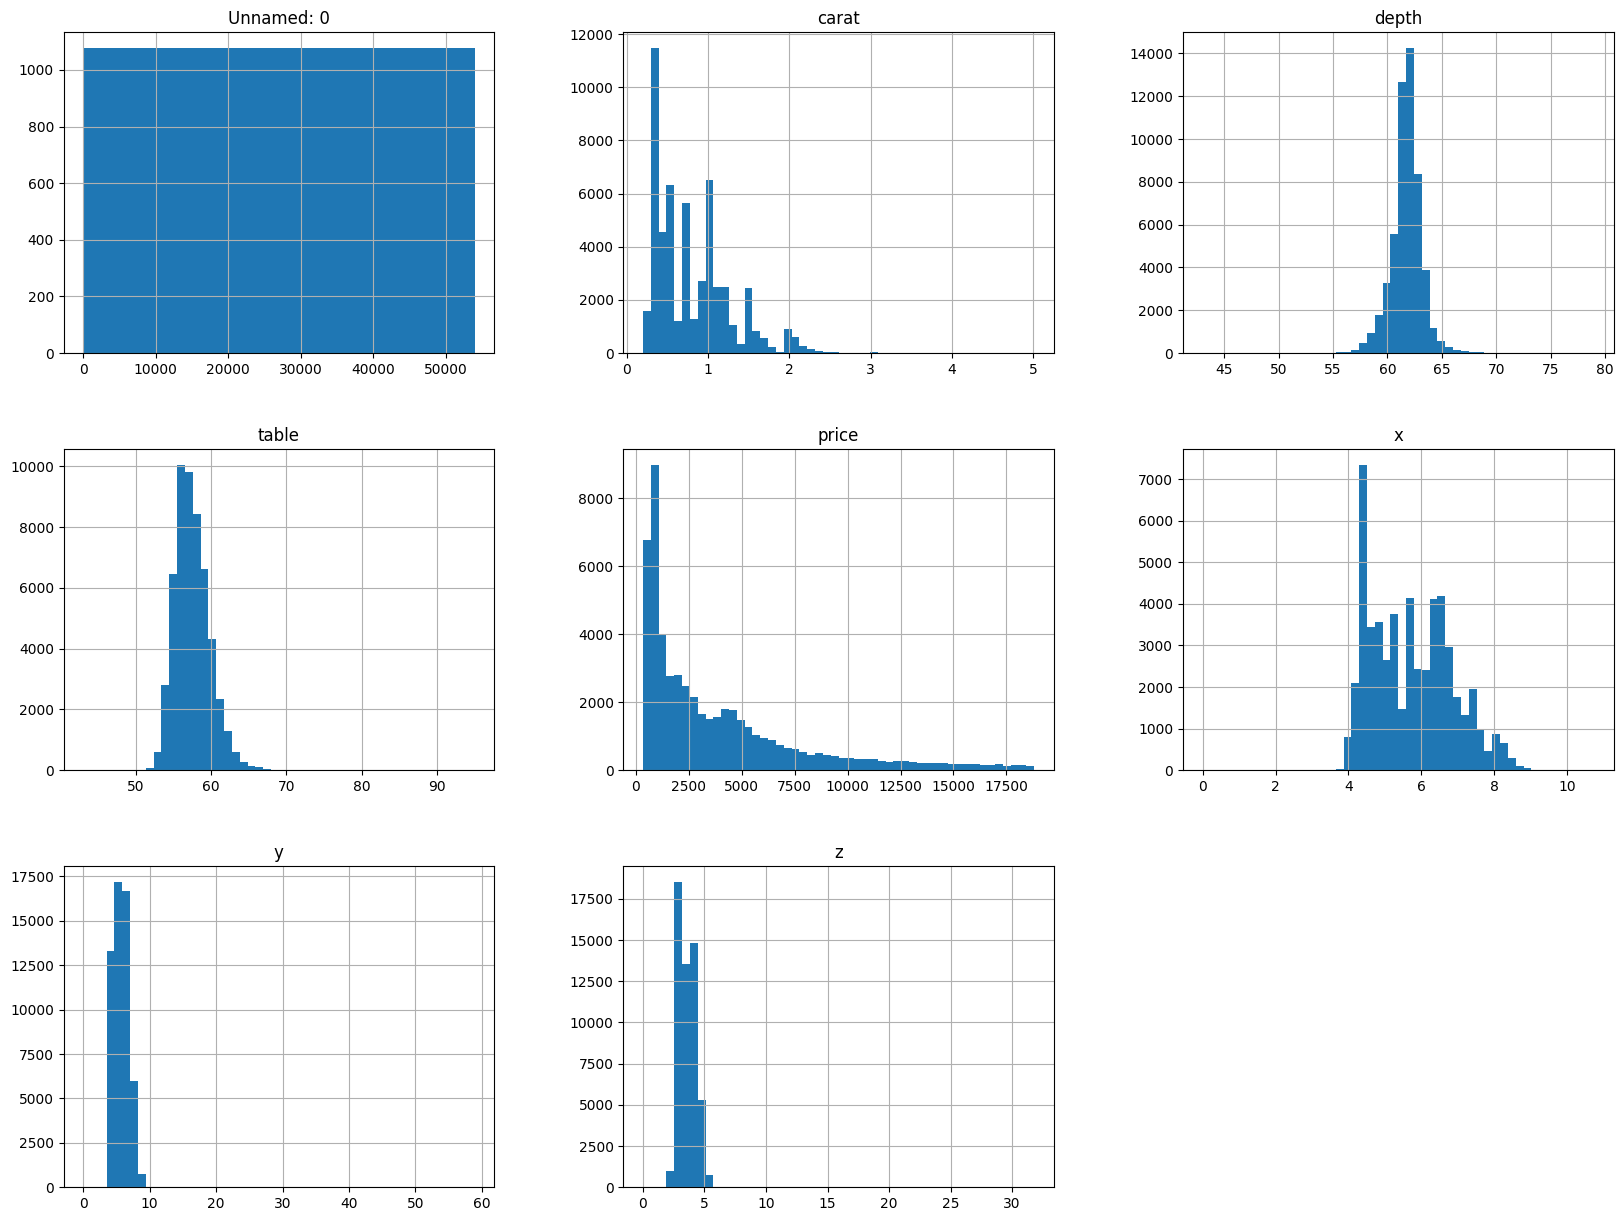

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

diamonds.hist(bins=50, figsize=(20,15))
plt.show()

### 3. Створення тестового набору

Потрібно створити тестовий набір (test set) із вхідного набору даних 

Тестовий набір має бути вибраний таким чином, щоб бути репрезентативним відносно категорій (statum'ів) атрибута `carat`. Для категоризації обрано саме атрибут `carat`, оскільки саме з цим атрибутом ціна має найбільшу кореляцію (у наступному розділі в цьому можна буде перкеонатись) і очевидно що кількість карат (тобто вага діаманта) є дуже важливим при прогнозуванні ціни діаманта.

Категоризуємо датасет відповідно до атрибуту `carat` (додаємо до датасету атрибут `carat_category`):

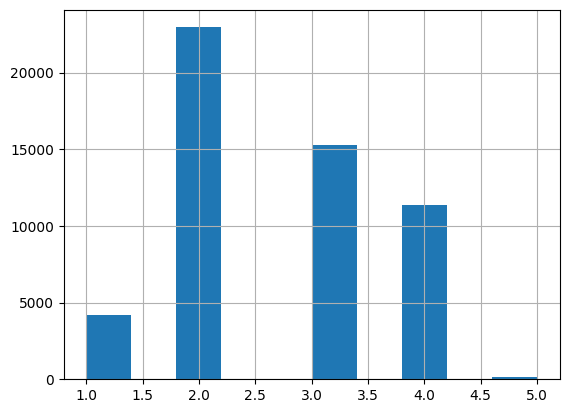

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# categorize given dataset according to сarat attribute
diamonds["carat_category"] = pd.cut(diamonds["carat"], bins=[0., 0.3, 0.7, 1.1, 2.5, np.inf], labels=[1, 2, 3, 4, 5], include_lowest=False)

# print a histogram
diamonds["carat_category"].hist()
plt.show()

Робимо розділення вхідного датасету на ***тренувальний набір*** (`train_set`) та ***тестовий набір*** (`test_set`)

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(diamonds, diamonds["carat_category"]):
    train_set = diamonds.loc[train_index]
    test_set = diamonds.loc[test_index]

Вилучаємо атрибут `carat_category` в датасеті, в тренувальному наборі та в тестувальному наборі, щоб повернути датасет до початкового стану

In [62]:
for set_ in (diamonds, train_set, test_set):
    set_.drop("carat_category", axis=1, inplace=True)

### 4. Вивчення та візуалізація даних
**Знаходження кореляцій**

Досліджуємо тренувальний набір (`train_set`).

Обчислюємо коефіцієнт кореляції Пірсона між кожним атрибутом та ціною діаманта (`price`):

In [66]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
carat         0.920823
x             0.883321
z             0.873449
y             0.859385
table         0.126502
depth        -0.008835
Unnamed: 0   -0.308604
Name: price, dtype: float64

Зображаємо точкові діаграми між атрибутом `price` та атрибутами, що найбільше з ним корельовані.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='carat', ylabel='price'>,
        <Axes: xlabel='x', ylabel='price'>,
        <Axes: xlabel='y', ylabel='price'>,
        <Axes: xlabel='z', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='carat'>,
        <Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='x', ylabel='carat'>,
        <Axes: xlabel='y', ylabel='carat'>,
        <Axes: xlabel='z', ylabel='carat'>],
       [<Axes: xlabel='price', ylabel='x'>,
        <Axes: xlabel='carat', ylabel='x'>,
        <Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='z', ylabel='x'>],
       [<Axes: xlabel='price', ylabel='y'>,
        <Axes: xlabel='carat', ylabel='y'>,
        <Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='z', ylabel='y'>],
       [<Axes: xlabel='price', ylabel='z'>,
        <Axes: xlabel='carat', ylabel='z'>,
        <Axes: xlabel='x', ylabel='z'>, <Axes: xlabe

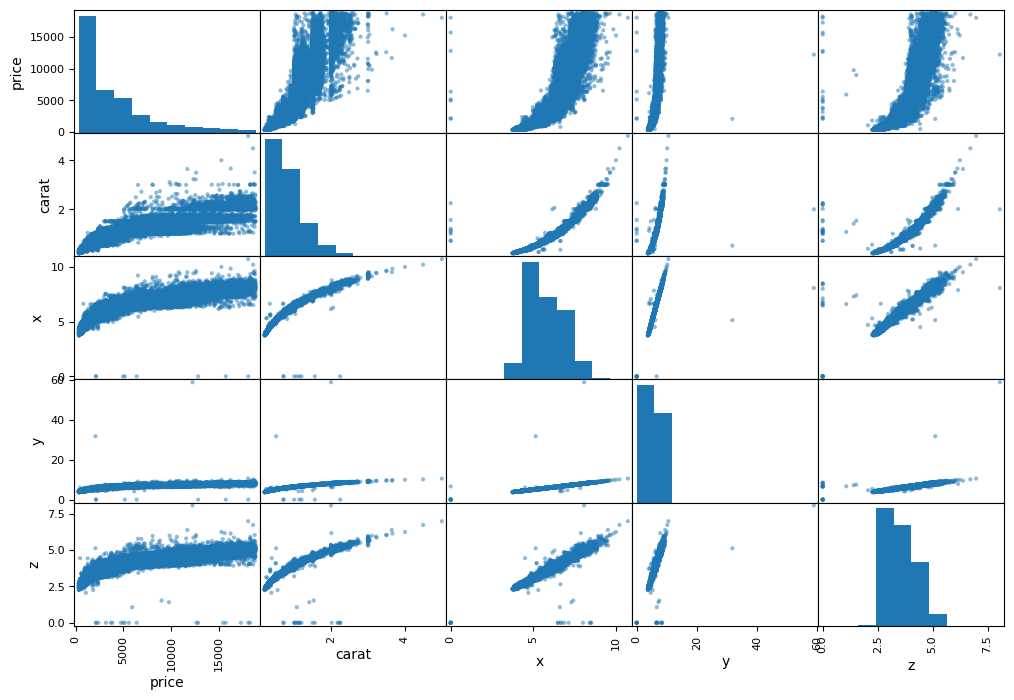

In [67]:
from pandas.plotting import scatter_matrix

attributes = ["price", "carat", "x", "y", "z"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

Підтверджно діаграмами, що атрибут `price` має досить сильну кореляцію з атрибутами `x`, `y`, `z`, `carat`. Можна чітко побачити тенденцію до зростання, і точки не надто розосереджені.

### 5. Підготовка даних до алгоритму Машинного навчання

У тренувальному наборі відділяємо predictors (`train_set_predictors`) та labels (`train_set_labels`) (бо ми будемо застосовувати до них різні перетворення)

In [68]:
train_set_predictors = train_set.drop("price", axis=1) # predictors
train_set_labels = train_set["price"].copy() # labels

Створимо **кастомний трансформер**, який вилучає заданмй атрибут з датасету

In [76]:
from sklearn.base import BaseEstimator, TransformerMixin


class CustomAttributeRemover(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_to_remove): # no *args or **kargs
        self.attribute_to_remove = attribute_to_remove
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(attribute_to_remove, axis=1)

Створимо пайплайн для числових атрибутів:
1. Хоч пропущених даних немає, але включимо в пайпалйн SimpleImputer з медіаною на випадок, якщо колись будуть дані з пропусками
2. Каcтомний трансформматор для того, щоб прибрати атрибут "Unnamed: 0", оскільки він відповідає за номерацію в датасеті і жодним чином не впливає на ціну.
3. Засосовуємо Feature scaling

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# pipeline for numericaol attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribute_remover', CustomAttributeRemover(attribute_to_remove="Unnamed: 0")),
        ('std_scaler', StandardScaler()),
])

Створимо pipeline, яка буде трансформувати всі атрибути: і числові і категорійні

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ["carat", "depth", "table", "x", "y", "z"]
cat_attribs = ["cut", "color", "clarity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

train_set_predictors_prepared = full_pipeline.fit_transform(train_set_predictors)

NameError: name 'OneHotEncoder' is not defined

Катмний трансформер: треба прибрати атрибут "Unnamed: 0", оскільки він відповідає за номерацію в датасеті

Хоч пропущених даних і немає, але ми все одно про всяк випадок застосовуємо клас SimpleImputer з медіаною

Також застосовуємо Feature scaling